In [103]:
import pandas as pd
import shap
import sklearn

from sqlalchemy import create_engine

In [104]:
def connect_db():
        # Env config
    POSTGRES_ADDRESS = '192.168.1.116'
    POSTGRES_PORT = '5433' 
    POSTGRES_USERNAME = 'root' 
    POSTGRES_PASSWORD = 'password' 
    POSTGRES_DBNAME = 'pystock' 


    # Create database connection
    postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                    .format(username=POSTGRES_USERNAME, 
                            password=POSTGRES_PASSWORD, 
                            ipaddress=POSTGRES_ADDRESS, 
                            port=POSTGRES_PORT, 
                            dbname=POSTGRES_DBNAME)) 

    # Create the connection 
    return create_engine(postgres_str)

In [ ]:
def fetch_output(cnx, debug):
    
    # Prepare param query
    param_fetch_query = '''
    SELECT
        sector,
        moving_avg_days,
        buy_threshold,
        sell_threshold
    FROM 
        simulations.summary() 
    INNER JOIN
    ORDER BY sim_id
    LIMIT 360000
    ;'''
    if debug == 1:
        print(price_fetch_query)

    # Fetch param data
    params = pd.read_sql_query(param_fetch_query, cnx)


    # Prepare result query
    result_fetch_query = '''
    SELECT
        sim_result
    FROM 
        simulations.summary() 
    ORDER BY sim_id
    LIMIT 360000
    ;'''
    if debug == 1:
        print(price_fetch_query)

    # Fetch param data
    df_results = pd.read_sql_query(result_fetch_query, cnx)
    
    
    results = df_results.sim_result.to_numpy()

    return params, results

In [123]:
cnx = connect_db()
params, results = fetch_output(cnx, 0)

#params.shape[1]
#X.head()

In [124]:


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


df = pd.DataFrame({'par1':[1,3,5,7,9, 11,13],
                   'par2':[0.2, 0.4, 0.5, 0.7, 1, 1.2, 1.45],
                   'par3':['yes', 'no', 'no', 'yes', 'no', 'yes', 'no'],
                   'par4':['blue', 'red', 'red', 'blue', 'green', 'green', 'blue'],
                   'output':[103, 310, 522, 711, 921, 1241, 1451]})

t = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), ['par3']),
    ('scale', StandardScaler(), ['par1', 'par2'])
], remainder='passthrough')

# Transform the features
features = t.fit_transform(df.iloc[:,:-1])
result = df.iloc[:,-1]

# Train the linear regression model
reg = LinearRegression()
model = reg.fit(features, result)

# Generate a prediction
example = t.transform(pd.DataFrame([{
    'par1': 2, 'par2': 0.33, 'par3': 'no', 'par4': 'red'
}]))
prediction = model.predict(example)
reg_score = reg.score(features, result)
print(prediction, reg_score)



model = sklearn.linear_model.LinearRegression()
model.fit(params, results)


LinearRegression()

In [125]:
print("Model coefficients:\n")
for i in range(3):
    print(params.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

moving_avg_days = 53.0478
buy_threshold = -62290.8382
sell_threshold = 107846.6443


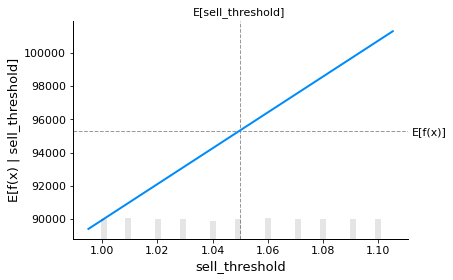

In [126]:
param_sample = shap.utils.sample(params, 10000) # 100 instances for use as the background distribution
shap.plots.partial_dependence(
    "sell_threshold", model.predict, param_sample, ice=False,
    model_expected_value=True, feature_expected_value=True
)

Exact explainer: 80001it [03:43, 341.17it/s]                           


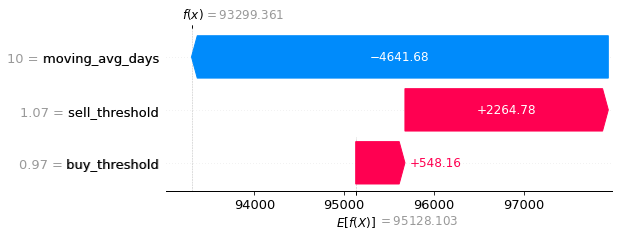

In [127]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, param_sample)
shap_values = explainer(params)

sample_ind = 18
shap.plots.waterfall(shap_values[sample_ind], max_display=3)

In [25]:
type(X)

pandas.core.frame.DataFrame

In [13]:
from sklearn import tree
X = [[0, 0], [0.5, 0.5], [0.8, 1], [1, 1.3]]
Y = [0, 0, 0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [14]:
clf.predict([[2., 2.]])


array([1])

In [15]:
clf.predict([[0.1, 1.1]])

array([0])

In [30]:
import numpy as np
import pandas as pd

X = pd.DataFrame([[5, 0.960, 1.050], [5, 0.970, 1.050], [5, 0.960, 1.040], [5, 0.960, 1.020], [6, 0.970, 1.020], [6, 0.970, 1.050], [6, 0.970, 1.040], [5, 0.970, 1.020], [6, 0.960, 1.040], [6, 0.960, 1.050], [6, 0.960, 1.020], [5, 0.960, 1.030], [7, 0.960, 1.020], [4, 0.970, 1.050], [4, 0.970, 1.040], [8, 0.960, 1.040], [5, 0.970, 1.040], [8, 0.960, 1.050], [7, 0.960, 1.050], [7, 0.960, 1.040], [8, 0.960, 1.020], [8, 0.950, 1.010], [8, 0.950, 1.050], [8, 0.950, 1.000], [8, 0.950, 1.040], [8, 0.950, 1.030], [8, 0.950, 1.020], [8, 0.960, 1.030], [6, 0.950, 1.020], [8, 0.940, 1.050], [8, 0.940, 1.040], [8, 0.940, 1.030], [8, 0.940, 1.020], [8, 0.940, 1.010], [8, 0.940, 1.000], [7, 0.950, 1.050], [7, 0.950, 1.040], [7, 0.950, 1.030], [7, 0.950, 1.020], [7, 0.950, 1.010], [7, 0.940, 1.050], [7, 0.940, 1.040], [7, 0.940, 1.030], [7, 0.940, 1.020], [7, 0.940, 1.010], [6, 0.950, 1.050], [6, 0.950, 1.040], [6, 0.950, 1.030], [6, 0.950, 1.010], [6, 0.960, 1.030], [8, 0.960, 1.010], [7, 0.960, 1.010], [6, 0.960, 1.010], [5, 0.960, 1.010], [5, 0.960, 1.000], [5, 0.970, 1.030], [6, 0.970, 1.000], [7, 0.950, 1.000], [6, 0.970, 1.030], [7, 0.960, 1.030], [8, 0.960, 1.000], [4, 0.940, 1.000], [4, 0.950, 1.000], [4, 0.950, 1.010], [4, 0.950, 1.050], [4, 0.940, 1.020], [4, 0.940, 1.030], [4, 0.940, 1.040], [4, 0.940, 1.050], [4, 0.940, 1.010], [4, 0.950, 1.040], [4, 0.950, 1.020], [4, 0.950, 1.030], [7, 0.970, 1.040], [7, 0.970, 1.050], [6, 0.970, 1.010], [7, 0.970, 1.000], [6, 0.960, 1.000], [7, 0.940, 1.000], [6, 0.950, 1.000], [4, 0.970, 1.000], [5, 0.940, 1.020], [5, 0.940, 1.010], [5, 0.940, 1.000], [5, 0.940, 1.030], [4, 0.960, 1.040], [4, 0.960, 1.030], [4, 0.960, 1.020], [4, 0.960, 1.010], [4, 0.960, 1.000], [5, 0.950, 1.020], [5, 0.950, 1.030], [5, 0.950, 1.040], [5, 0.950, 1.050], [6, 0.940, 1.000], [6, 0.940, 1.010], [6, 0.940, 1.020], [6, 0.940, 1.030], [6, 0.940, 1.040], [6, 0.940, 1.050], [5, 0.940, 1.040], [5, 0.940, 1.050], [5, 0.950, 1.000], [5, 0.950, 1.010], [4, 0.960, 1.050], [5, 0.970, 1.010], [4, 0.970, 1.030], [5, 0.970, 1.000], [7, 0.960, 1.000], [4, 0.970, 1.010], [8, 0.970, 1.040], [8, 0.970, 1.050], [4, 0.970, 1.020], [7, 0.970, 1.010], [8, 0.970, 1.010], [7, 0.970, 1.030], [7, 0.970, 1.020], [8, 0.970, 1.020], [8, 0.970, 1.030], [8, 0.970, 1.000]])

Y = [[104552.00], [96154.85], [93936.36], [92974.60], [91978.41], [90850.24], [90850.24], [89702.48], [89193.65], [89193.65], [88337.77], [88087.72], [86561.06], [86403.02], [86403.02], [86280.82], [86280.82], [86280.82], [86280.82], [86280.82], [85808.75], [84913.03], [84913.03], [84913.03], [84913.03], [84913.03], [84913.03], [84000.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83847.81], [83677.69], [83573.93], [83401.29], [81777.69], [81500.22], [81500.22], [80918.46], [80906.71], [80781.07], [80501.88], [80253.57], [80033.73], [79984.11], [79984.11], [79984.11], [79984.11], [79984.11], [79984.11], [79984.11], [79984.11], [79984.11], [79984.11], [79984.11], [79984.11], [79789.61], [79789.61], [79419.05], [79276.47], [79167.82], [78904.87], [78904.87], [78819.40], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78792.61], [78294.98], [77533.22], [77306.66], [77231.08], [76735.19], [76727.51], [76727.51], [75747.01], [75131.26], [74357.88], [74213.95], [73268.12], [70511.07], [69021.62], [68078.75]]


model = sklearn.linear_model.LinearRegression()
model.fit(X, Y)
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, Y)

LinearRegression()

In [31]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))
    

Model coefficients:

0 = [  176.8575  -834.4233 97470.7471]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [151]:
import yfinance as yf

msft = yf.Ticker("ATT.L")

# get stock info
msft.info

{'ebitdaMargins': None,
 'profitMargins': None,
 'grossMargins': None,
 'operatingCashflow': None,
 'revenueGrowth': None,
 'operatingMargins': None,
 'ebitda': None,
 'targetLowPrice': None,
 'recommendationKey': 'none',
 'grossProfits': 523135000,
 'freeCashflow': None,
 'targetMedianPrice': None,
 'currentPrice': 253.5,
 'earningsGrowth': None,
 'currentRatio': None,
 'returnOnAssets': None,
 'numberOfAnalystOpinions': None,
 'targetMeanPrice': None,
 'debtToEquity': None,
 'returnOnEquity': None,
 'targetHighPrice': None,
 'totalCash': None,
 'totalDebt': None,
 'totalRevenue': None,
 'totalCashPerShare': None,
 'financialCurrency': 'GBP',
 'maxAge': 1,
 'revenuePerShare': None,
 'quickRatio': None,
 'recommendationMean': None,
 'exchange': 'LSE',
 'shortName': 'ALLIANZ TECHNOLOGY TRUST PLC OR',
 'longName': 'Allianz Technology Trust PLC',
 'exchangeTimezoneName': 'Europe/London',
 'exchangeTimezoneShortName': 'BST',
 'isEsgPopulated': True,
 'gmtOffSetMilliseconds': '3600000',
 'u

In [147]:

import yfinance as yf

stocks = ['BP.L', 'SMT.L', 'HSBA.L']

for stock in stocks:
    info = yf.Ticker(stock).info
    sec = info.get('sector')
    ind = info.get('industry')
    print(stock, sec, ind)

BP.L Energy Oil & Gas Integrated
SMT.L None None
HSBA.L Financial Services Banks—Diversified
